4.1 VGG16 Model Parameters

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

Step2

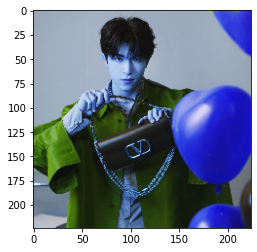

In [ ]:
img = cv2.imread("image6.jpg")
center = (img.shape[1]/2,img.shape[0]/2)
h = img.shape[0]
w = img.shape[1]
if(h > w):
    h = w
else:
    w = h
img = cv2.getRectSubPix(img, (w,h),center)
img = cv2.resize(img,(224,224))
plt.imshow(img)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [ ]:
model = VGG16()

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Step3

In [ ]:
kernels, biases = model.layers[1].get_weights()
model.layers[1].get_config()

[ 0.73429835  0.09340367  0.06775674  0.8862966   0.25994542  0.66426694
 -0.01582893  0.3249065   0.68600726  0.06247932  0.58156496  0.2361475
  0.69694996  0.19451167  0.4858922   0.44571847  0.5113422   0.208576
  0.57557714  0.33199573  0.4997983   0.7117759   0.30284074  0.7082712
  0.04548979  0.7446502   0.29845494  0.48211655  0.81658626  0.62603897
  0.3768093   2.064037    0.77311045  0.3459577   0.6130958   0.65459156
  0.39045632  0.50869167  0.2625384   0.23669638  0.07971057  1.1179353
  0.26129362  0.8697589   0.21543622  0.78007823  0.37015367  0.47993386
  0.4313978   0.5084194   0.23049663  0.7636527   0.35419866  0.45794216
  0.4662595   0.09850298  0.3803252   0.66880196  0.4015123   0.90510356
  0.43166816  1.302014    0.5306885   0.48993504]


Step4

In [ ]:
img = img_to_array(img)

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
img = expand_dims(img, axis=0)
img_ready = preprocess_input(img)

Step5

In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


Step6

In [ ]:
feature_maps = model.predict(img_ready)

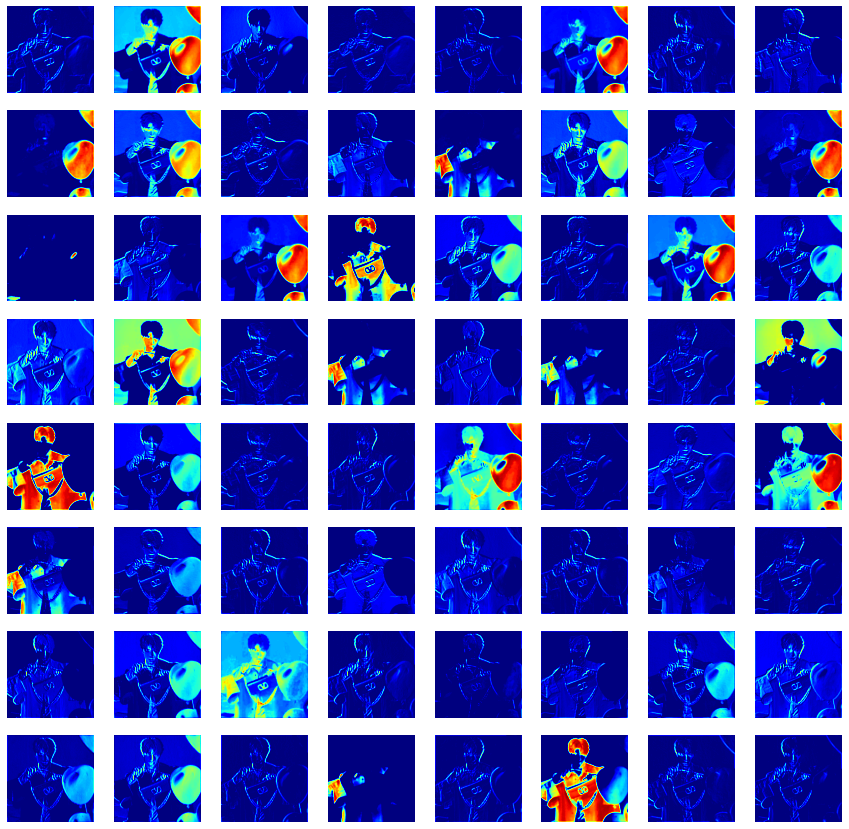

In [ ]:
fig, ax = plt.subplots(8, 8, figsize=(15,15))
fig.patch.set_facecolor('white')
index = 0
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(feature_maps[0,:,:,index],cmap="jet")
        ax[i,j].axis("off")
        index+=1